In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [13]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfY = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfY], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


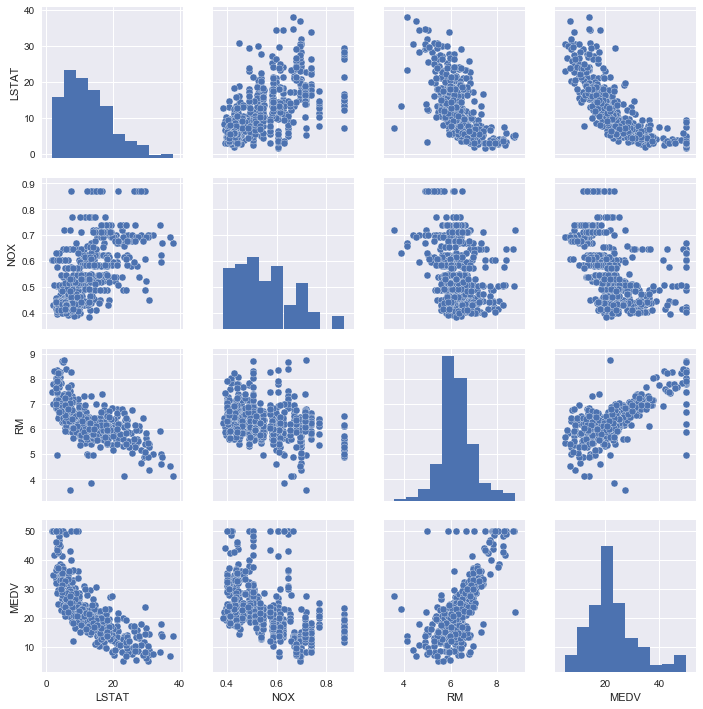

In [15]:
cols = ["LSTAT", "NOX", "RM", "MEDV"]
sns.pairplot(df[cols])
plt.show()

In [17]:
from sklearn.datasets import make_regression

X, y, w = make_regression(n_samples=10, n_features=1, bias=0, noise=0, coef=True, random_state=0)

In [18]:
X

array([[ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [ 0.95008842],
       [ 1.76405235],
       [ 0.4105985 ],
       [-0.97727788],
       [ 0.40015721],
       [-0.10321885],
       [-0.15135721]])

In [20]:
y

array([ 77.48913677, 177.41712535, 147.85924209,  75.22087885,
       139.66444108,  32.50811146, -77.37353667,  31.6814481 ,
        -8.17209494, -11.98332915])

In [21]:
w

array(79.17250381)

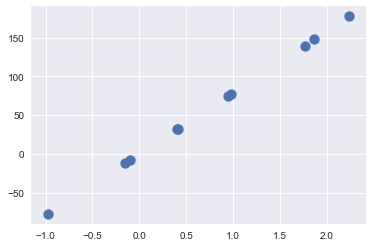

In [22]:
plt.scatter(X, y, s=100)
plt.show()

In [164]:
def make_regression2(n_samples=10, n_features=1, n_targets=1, \
                     bias=0.0, noise=0.0, random_state=None):
    np.random.seed(random_state)
    X = np.random.randn(n_samples, n_features)
    w = np.random.sample(n_features) + np.random.randint(-100, 100, n_features)
    e = np.random.randn(n_samples) * noise # disturbance는 정규분포를 따른다.(randn을 써야)
    y = np.dot(X, w) + bias + e
    
    return X, y, w

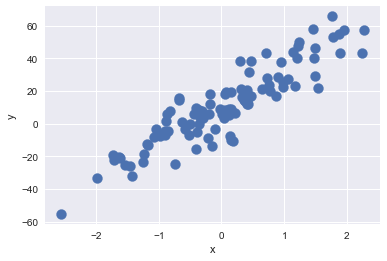

In [166]:
X, y, w = make_regression2(n_samples=100, bias=10,\
                           noise=10, random_state=0)
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [168]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=2, \
                             bias=100, noise=10, coef=True, random_state=1)

In [169]:
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [171]:
X = np.hstack([np.ones((X0.shape[0], 1)), X0])

In [173]:
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

In [174]:
import statsmodels.api as sm

X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

### _Numpy를 이용한 선형회귀분석_

In [175]:
from sklearn.datasets import make_regression

In [178]:
bias = 100
X0, y, coef = make_regression(n_samples=100, n_features=1,\
                            bias=bias, noise=10, coef=True, random_state=1)

X = sm.add_constant(X0)
y = y.reshape(len(y), 1) # 어떤 의미일까?

In [179]:
coef

array(80.71051956)

In [180]:
# OLS 해를 직접 이용하는 방법. y = 100 + 80.7105 * x + e

w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
w

array([[102.02701439],
       [ 81.59750943]])

In [ ]:
# lstsq 명령을 이용하는 방법.



### _Scikit-Learn 패키지를 사용한 선형회귀분석_

In [183]:
import sklearn as sk

In [184]:
model = sk.LinearRegression(fit_intercept=True)

AttributeError: module 'sklearn' has no attribute 'LinearRegression'